In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import utils
from keras import regularizers, optimizers

from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [3]:
input_dim = X_train.shape[1]
encoding_dim = 32

autoencoder = Sequential()

#encoder
autoencoder.add(Dense(encoding_dim, input_shape=(input_dim,), activation='relu'))

#decoder
autoencoder.add(Dense(input_dim, activation='sigmoid'))

input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
history = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.5322 - val_loss: 0.4591
Epoch 2/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.4270 - val_loss: 0.4068
Epoch 3/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.3955 - val_loss: 0.3877
Epoch 4/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.3786 - val_loss: 0.3728
Epoch 5/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.3648 - val_loss: 0.3603
Epoch 6/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.3531 - val_loss: 0.3497
Epoch 7/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.3437 - val_loss: 0.3416
Epoch 8/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.3365 - val_los

In [4]:
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.fit_transform(X_test)

pca = PCA(n_components=1)
X_pca_train = pca.fit_transform(X_train_norm)
X_pca_test = pca.transform(X_test_norm)

X_pca_train = pca.inverse_transform(X_pca_train)
X_pca_train = norm.inverse_transform(X_pca_train)
X_pca_test = pca.inverse_transform(X_pca_test)
X_pca_test = norm.inverse_transform(X_pca_test)

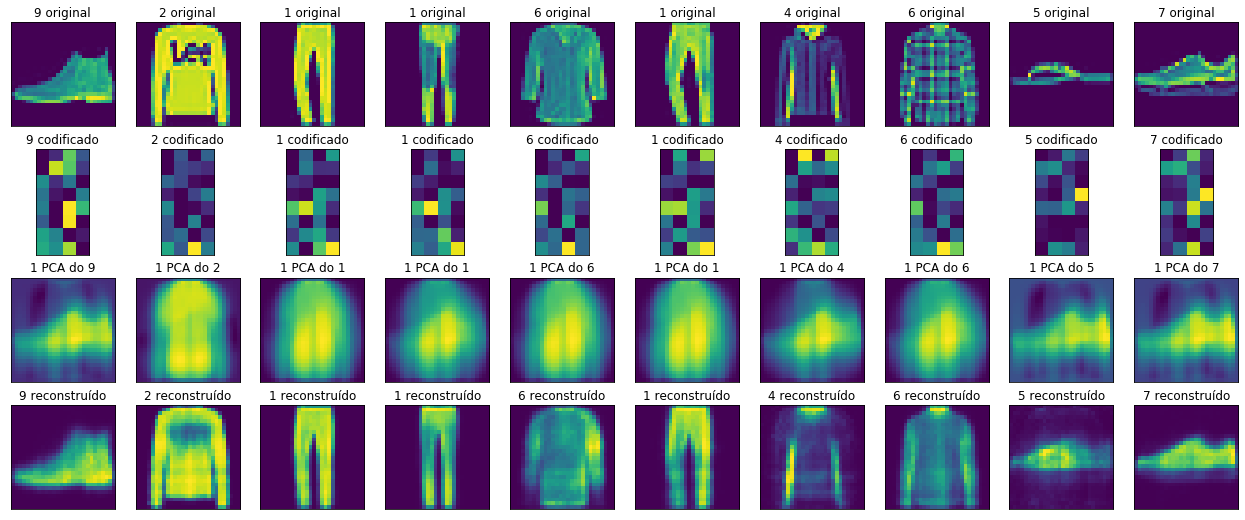

In [6]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

fig, ax = plt.subplots(4, 10, figsize=(22, 9))

for i in range(10):
    ax[0][i].imshow(X_test[i].reshape(28, 28))
    ax[0][i].set_title('%d original'%(y_test[i]))
    ax[0][i].get_xaxis().set_visible(False)
    ax[0][i].get_yaxis().set_visible(False)
    
    ax[1][i].imshow(encoded_imgs[i].reshape(8, 4))
    ax[1][i].set_title('%d codificado'%(y_test[i]))
    ax[1][i].get_xaxis().set_visible(False)
    ax[1][i].get_yaxis().set_visible(False)
    
    ax[2][i].imshow(X_pca_test[i].reshape(28, 28))
    ax[2][i].set_title('1 PCA do %d'%(y_test[i]))
    ax[2][i].get_xaxis().set_visible(False)
    ax[2][i].get_yaxis().set_visible(False)

    ax[3][i].imshow(decoded_imgs[i].reshape(28, 28))
    ax[3][i].set_title('%d reconstruído'%(y_test[i]))
    ax[3][i].get_xaxis().set_visible(False)
    ax[3][i].get_yaxis().set_visible(False)

plt.savefig('results/fmnist_plot_el1_dl1.pdf', dpi=100, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

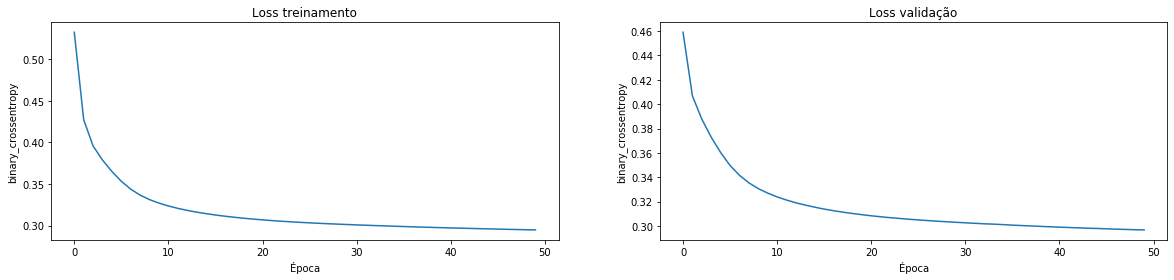

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(20, 4))
loss = history.history['loss']
val_loss = history.history['val_loss']

ax[0].plot(loss)
ax[0].set_ylabel('binary_crossentropy')
ax[0].set_xlabel('Época')
ax[0].set_title('Loss treinamento')

ax[1].set_title('Loss validação')
ax[1].plot(val_loss)
ax[1].set_ylabel('binary_crossentropy')
ax[1].set_xlabel('Época')

plt.savefig('results/fmnist_loss_el2_dl2.pdf', dpi=100, bbox_inches='tight', transparent=False, pad_inches=0.1)

In [8]:
input_dim = X_train.shape[1]
encoding_dim = 32

autoencoder = Sequential()

#encoder
autoencoder.add(Dense(encoding_dim*2, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

#decoder
autoencoder.add(Dense(encoding_dim*2, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

input_img = Input(shape=(input_dim,))
encoder_layer = autoencoder.layers[0]
encoder = Model(input_img, encoder_layer(input_img))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
history = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.5089 - val_loss: 0.4149
Epoch 2/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.3880 - val_loss: 0.3755
Epoch 3/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.3676 - val_loss: 0.3584
Epoch 4/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.3539 - val_loss: 0.3490
Epoch 5/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.3414 - val_loss: 0.3388
Epoch 6/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.3329 - val_loss: 0.3292
Epoch 7/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.3269 - val_loss: 0.3292
Epoch 8/50
60000/60000 [==============================] - 2s 42us/step - loss: 0.3228 - val_loss: 0.3219
Epoch 9/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3201 - val_loss: 0.3201
Epoch

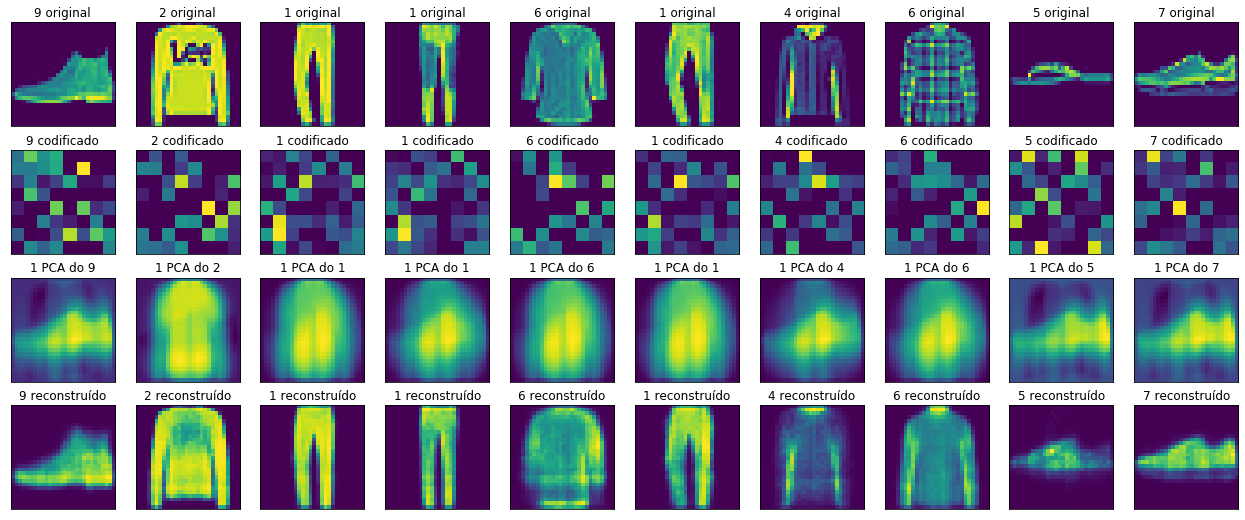

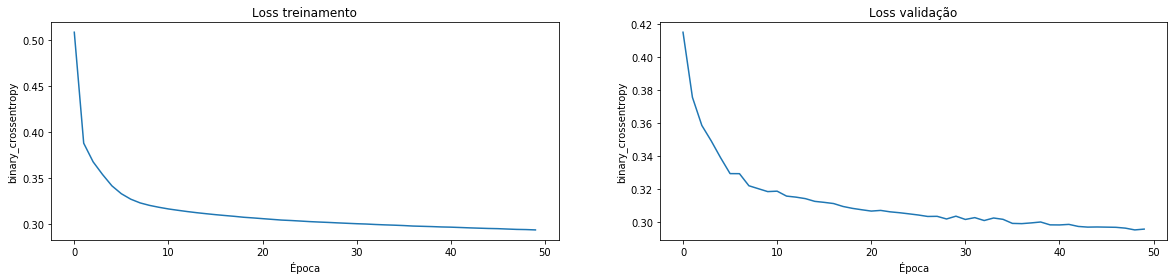

In [9]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = autoencoder.predict(X_test)

fig, ax = plt.subplots(4, 10, figsize=(22, 9))

for i in range(10):
    ax[0][i].imshow(X_test[i].reshape(28, 28))
    ax[0][i].set_title('%d original'%(y_test[i]))
    ax[0][i].get_xaxis().set_visible(False)
    ax[0][i].get_yaxis().set_visible(False)
    
    ax[1][i].imshow(encoded_imgs[i].reshape(8, 8))
    ax[1][i].set_title('%d codificado'%(y_test[i]))
    ax[1][i].get_xaxis().set_visible(False)
    ax[1][i].get_yaxis().set_visible(False)
    
    ax[2][i].imshow(X_pca_test[i].reshape(28, 28))
    ax[2][i].set_title('1 PCA do %d'%(y_test[i]))
    ax[2][i].get_xaxis().set_visible(False)
    ax[2][i].get_yaxis().set_visible(False)

    ax[3][i].imshow(decoded_imgs[i].reshape(28, 28))
    ax[3][i].set_title('%d reconstruído'%(y_test[i]))
    ax[3][i].get_xaxis().set_visible(False)
    ax[3][i].get_yaxis().set_visible(False)

plt.savefig('results/mnist_plot_el2_dl2.pdf', dpi=100, bbox_inches='tight', 
            transparent=False, pad_inches=0.1)

fig, ax = plt.subplots(1, 2, figsize=(20, 4))
loss = history.history['loss']
val_loss = history.history['val_loss']

ax[0].plot(loss)
ax[0].set_ylabel('binary_crossentropy')
ax[0].set_xlabel('Época')
ax[0].set_title('Loss treinamento')

ax[1].set_title('Loss validação')
ax[1].plot(val_loss)
ax[1].set_ylabel('binary_crossentropy')
ax[1].set_xlabel('Época')

plt.savefig('results/fmnist_loss_el2_dl2.pdf', dpi=100, bbox_inches='tight', transparent=False, pad_inches=0.1)